# Free Kick Simulation: Test Notebook

## Introduction

This notebook is dedicated to testing the implementation of the **Free Kick Environment** in a football simulation. The main goal is to verify the correct functionality of the **FreeKickEnv class** and related functions such as **draw_pitch**.

### Objectives:
- Test the **FreeKickEnv** class.
- Verify the correct **rendering** of the football pitch and the **movement of the ball**.
- Ensure that the **actions** (such as passing, shooting, dribbling) behave as expected.

---

## Test Environment

We will first import all necessary classes and functions for the test.

In [1]:
import subprocess
import sys

# List of required packages
required_packages = [
    "pandas", "numpy", "matplotlib", "gym", "gymnasium"
]

def install_package(package):
    """Installs a package using pip if it's not already installed."""
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Check and install missing packages
for package in required_packages:
    install_package(package)


pandas is already installed.
numpy is already installed.
matplotlib is already installed.
gym is already installed.
gymnasium is already installed.


In [2]:
# Import necessary modules
from freeKickEnv import FreeKickEnv
from drawPitch import draw_pitch
from utils import ACTION_NAMES, to_field

from IPython.display import clear_output, display  # For updating the output in Jupyter

import matplotlib.pyplot as plt
import time

### Test 1: Initializing the environment and checking the initial state

We initialize the environment and check that the starting positions of the players and ball are correctly set.

In [3]:
# Initialize the environment
env = FreeKickEnv()
obs, _ = env.reset()

# Print the initial state of the environment
print("Initial attackers:\n", env.attackers)
print("Initial defenders:\n", env.defenders)
print("Initial ball position:\n", env.ball)

Initial attackers:
 [[0.74 0.5 ]
 [0.9  0.65]
 [0.9  0.35]]
Initial defenders:
 [[0.826 0.49 ]
 [0.826 0.51 ]
 [0.98  0.5  ]]
Initial ball position:
 [0.75 0.5 ]


### Test 2: Rendering the field

We will render the initial state of the field and visualize the positions of the players and the ball.

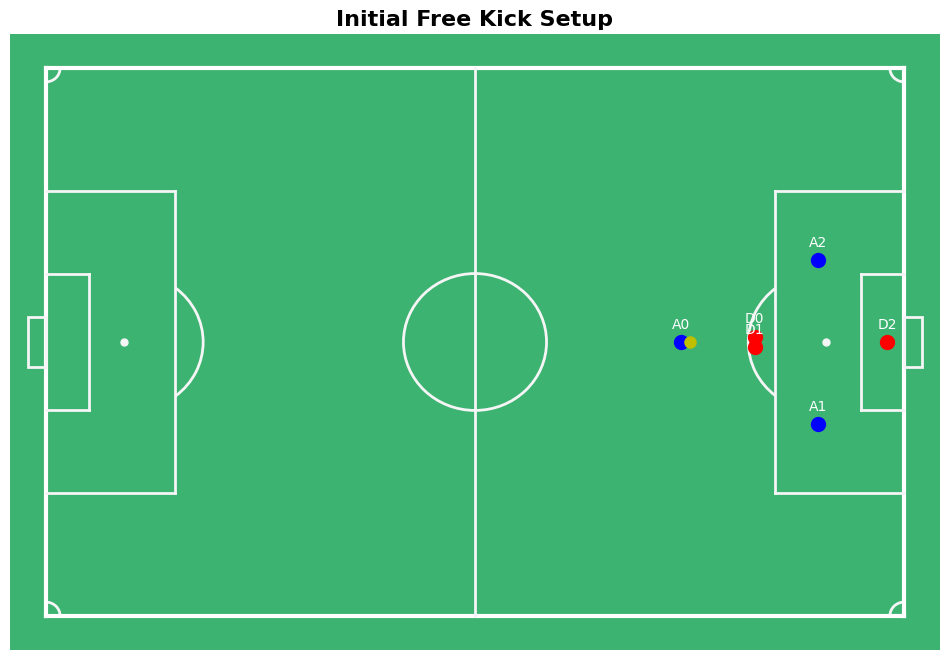

In [4]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Render the initial field with player and ball positions
draw_pitch(ax=ax)

# Plot players and ball positions
for i, player in enumerate(env.attackers):
    x, y = to_field(player)
    ax.plot(x, y, 'bo', markersize=10)
    ax.text(x, y - 2, f"A{i}", color='white', ha='center')

for i, player in enumerate(env.defenders):
    x, y = to_field(player)
    ax.plot(x, y, 'ro', markersize=10)
    ax.text(x, y - 2, f"D{i}", color='white', ha='center')

ball_x, ball_y = to_field(env.ball)
ax.plot(ball_x, ball_y, 'yo', markersize=8)

plt.title("Initial Free Kick Setup", fontsize = 16, fontweight = "bold")
plt.show()

### Test 3: Applying random actions and updating the field

In this step, we will sample random actions and see how the environment responds to them, with the updated state visualized after each action.

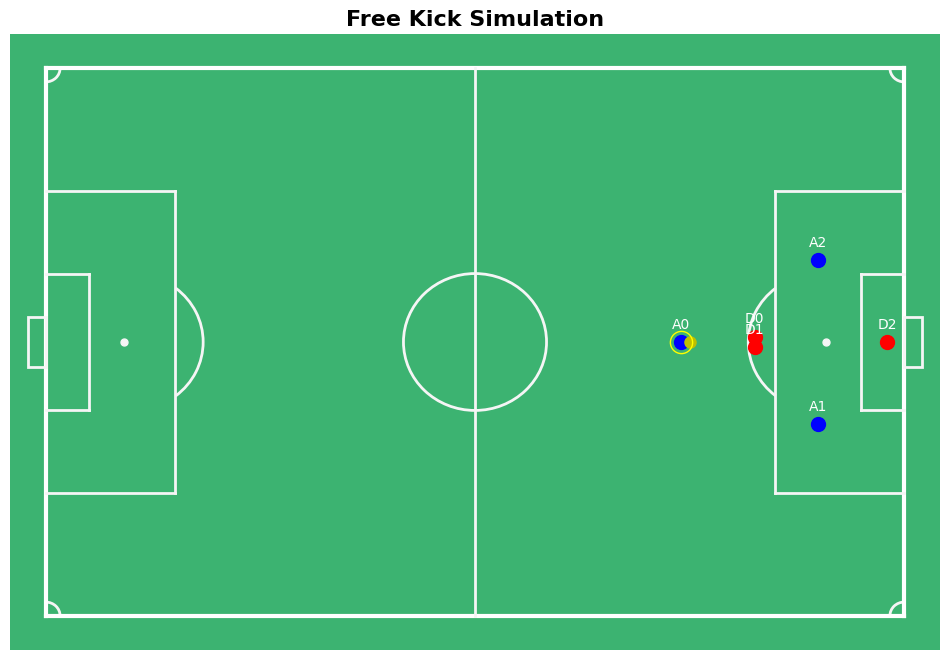

Step 1 | Actions: ['Dribble Right', 'Dribble Right', 'Pass to A2', 'Dribble Down', 'Dribble Down', 'Dribble Down']
Player 0 reward: 0.00
Player 1 reward: -10.00
Player 2 reward: -10.00
Player 3 reward: -5.00
Player 4 reward: -5.00
Player 5 reward: -5.00
Total Team Reward: -35.00
----------------------------------------
SIMULATION ENDED. Total Reward: -35.00


In [12]:


# Create the environment
env = FreeKickEnv()
obs, _ = env.reset()

# Create a persistent figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize total reward
total_reward = 0

# --- START SIMULATION LOOP ---
done = False
while not done:
    # Sample random action for each player
    actions = [env.action_space.sample() for _ in range(6)]  # One action for each player (A0, A1, A2, D0, D1, D2)

    # Apply the actions
    obs, reward, done, _, info = env.step(actions)

    # Update the total reward
    total_reward += reward

    # Clear axis and redraw pitch
    ax.clear()
    draw_pitch(ax=ax)

    # Plot attackers (blue)
    for i, player in enumerate(env.attackers):
        x, y = to_field(player)
        ax.plot(x, y, 'bo', markersize=10)
        ax.text(x, y - 2, f"A{i}", color='white', ha='center')

    # Plot defenders (red)
    for i, player in enumerate(env.defenders):
        x, y = to_field(player)
        ax.plot(x, y, 'ro', markersize=10)
        ax.text(x, y - 2, f"D{i}", color='white', ha='center')

    # Plot ball (yellow)
    bx, by = to_field(env.ball)
    ax.plot(bx, by, 'yo', markersize=8)

    # Highlight ball owner
    ox, oy = to_field(env.attackers[env.ball_owner])
    ax.plot(ox, oy, 'o', markersize=16, markerfacecolor='none', markeredgecolor='yellow', linewidth=1.5)

    # Check if a goal has been scored
    if env._check_goal():
        print("GOAL!")
        ax.set_title("Goal Scored! Free Kick Simulation", fontsize=16, fontweight="bold")
    else:
        ax.set_title("Free Kick Simulation", fontsize=16, fontweight="bold")

    # Force plot update in Jupyter
    fig.canvas.draw()
    fig.canvas.flush_events()
    clear_output(wait=True)
    display(fig)

    # Print action and reward
    actions_names = [ACTION_NAMES[action] for action in actions]
    print(f"Step {env.current_step} | Actions: {actions_names}")

    # Print individual rewards for each player
    for i in range(6):
        print(f"Player {i} reward: {info['individual_rewards'][i]:.2f}")

    # Print total team reward for the episode
    print(f"Total Team Reward: {total_reward:.2f}")

    # Delay between frames
    time.sleep(1.0)

# End of the loop when done
print(40 * "-")
print(f"SIMULATION ENDED. Total Reward: {total_reward:.2f}")

# Turn off interactive mode and close the figure to avoid extra rendering
plt.ioff()
plt.close(fig)